In [1]:
#!pip install pydot graphviz

In [2]:
import numpy as np
import random
import copy
import pydot
import contextlib
import io
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image, display

In [3]:
#TODO

# Abre o arquivo "grafo.txt" em modo de leitura
f = open("grafos.txt", "r")

# Lê a primeira linha do arquivo para obter o número de vértices no grafo
vertices = int(f.readline())

# Cria a matriz de adjacencia a partir de grafos.txt
matriz_adj  = np.loadtxt("grafos.txt", skiprows = 1, dtype = int)

# Função para criar uma lista de adjacências a partir da matriz de adjacência do grafo
def cria_list_adj(grafo):
    list_adj = dict()

    for i in range(vertices):
        # Encontra os índices onde a matriz de adjacência possui valor 1 para o vértice i
        adj_indices = np.where(grafo[i] == 1)[0]

        # Converte os índices em uma lista de vértices adjacentes ao vértice i
        adj_vertices = list(adj_indices)

        list_adj[i] = adj_vertices

    return list_adj

# Chama a função para criar a lista de adjacências
lista_adj = cria_list_adj(matriz_adj)

In [4]:
def plotar_grafo(lista_arestas=None):
    graph = pydot.Dot(graph_type='graph', rankdir='LR', dpi=100)

    if lista_arestas:
        for aresta in lista_arestas:
            graph.add_edge(pydot.Edge(str(aresta[0]), str(aresta[1])))

    plt = Image(graph.create_png())
    display(plt)

In [5]:
def lista_adj_para_arestas(lista_adj):
    arestas = set()

    for vertice, adjacentes in lista_adj.items(): # para cada vertice da lista_adj
        for adj in adjacentes: #para cada vizinho do vértice
            # Para garantir que cada aresta seja única, ordenamos os vértices
            aresta = tuple(sorted([vertice, adj])) # ordem crescente
            arestas.add(aresta) # o conjunto não aceita valores repetidos, então ao adicionar uma aresta repetida ele apenas ignora

    return arestas

arestas = lista_adj_para_arestas(lista_adj)
arestas = sorted(list(arestas))
arestas

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (2, 5),
 (4, 5),
 (4, 6),
 (5, 6)]

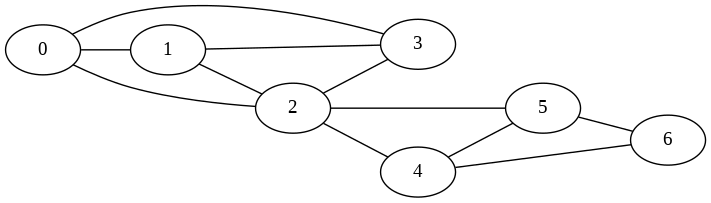

In [6]:
plotar_grafo(arestas)

# Algoritmo de Karger

In [7]:
def contrair_aresta(lista_adj, arestas):

    aresta_selecionada = random.choice(arestas)
    arestas.remove(aresta_selecionada)
    print("Aresta contraída: ", aresta_selecionada)
    novo_vertice = max(lista_adj.keys()) + 1

    # Pegar todos os vértices adjacentes para cada vértice na aresta selecionada
    adjacentes_aresta_selecionada = []
    for v in aresta_selecionada:
        adjacentes_aresta_selecionada.extend(lista_adj[v])

    # Inicializa uma lista vazia para armazenar os vértices filtrados
    novos_adjacentes = []

    # Itera sobre cada vértice em adjacentes_aresta_selecionada
    for v in adjacentes_aresta_selecionada:
        # Verifica se o vértice não está em aresta_selecionada
        if v not in aresta_selecionada:
            # Se não estiver, adiciona à lista de novos_adjacentes
            novos_adjacentes.append(v)


    lista_adj[novo_vertice] = novos_adjacentes
    del lista_adj[aresta_selecionada[0]]
    del lista_adj[aresta_selecionada[1]]

    for vertice, adjacentes in lista_adj.items():
      # Cria uma nova lista para armazenar os vértices adjacentes atualizados
      novos_adjacentes = []

      # Itera sobre cada vértice adjacente
      for v in adjacentes:
          # Se o vértice adjacente estiver na aresta selecionada, substitui pelo novo vértice
          if v in aresta_selecionada:
              novos_adjacentes.append(novo_vertice)
          # Caso contrário, mantém o vértice original
          else:
              novos_adjacentes.append(v)

      # Atualiza a lista de adjacências do vértice atual com os vértices adjacentes atualizados
      lista_adj[vertice] = novos_adjacentes

    # Cria uma nova lista para armazenar as arestas atualizadas
    novas_arestas = []

    # Itera sobre cada aresta na lista de arestas
    for aresta in arestas:
        # Cria uma nova aresta atualizando os vértices se necessário
        aresta_atualizada = []
        for x in aresta:
            if x in aresta_selecionada:
                aresta_atualizada.append(novo_vertice)
            else:
                aresta_atualizada.append(x)

        # Converte a lista em uma tupla e ordena os vértices
        aresta_atualizada = tuple(sorted(aresta_atualizada))

        # Evita arestas com mesmo vértice
        if aresta_atualizada[0] != aresta_atualizada[1]:
            novas_arestas.append(aresta_atualizada)


    #print(arestas)
    #print(lista_adj)
    return lista_adj, novas_arestas

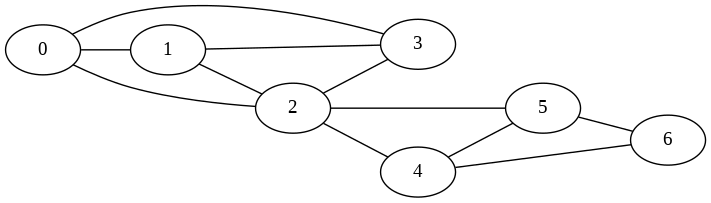

Aresta contraída:  (0, 1)


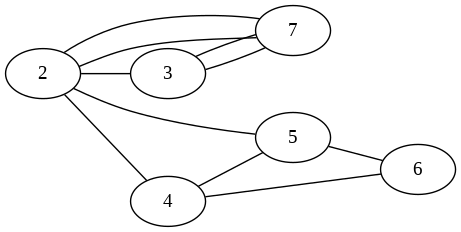

Aresta contraída:  (2, 3)


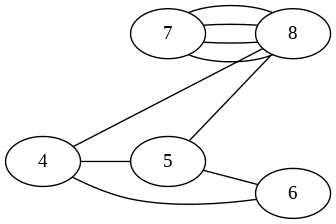

Aresta contraída:  (7, 8)


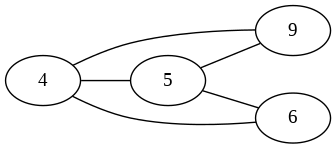

Aresta contraída:  (4, 9)


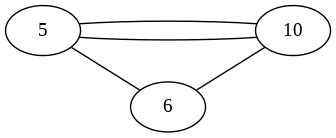

Aresta contraída:  (5, 10)


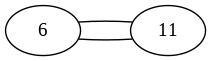

Corte mínimo:  2


In [8]:
def karger_contração(lista_adj_original, arestas_original):
    lista_adj = copy.deepcopy(lista_adj_original)
    arestas = copy.deepcopy(arestas_original)

    while len(lista_adj) > 2:
        plotar_grafo(arestas)
        lista_adj, arestas = contrair_aresta(lista_adj, arestas)
    plotar_grafo(arestas)
    print("Corte mínimo: ", len(arestas))
    corte_min = len(arestas)
    return lista_adj, arestas, corte_min

lista_adj_final, arestas_final, corte_min = karger_contração(lista_adj, arestas)

In [9]:
def karger_contracao2(lista_adj_original, arestas_original,N_iter):
    melhor = []
    for i in range(N_iter):
      lista_adj = copy.deepcopy(lista_adj_original)
      arestas = copy.deepcopy(arestas_original)
      while len(lista_adj) > 2:
          lista_adj, arestas = contrair_aresta(lista_adj, arestas)
      melhor.append(len(arestas))

    return lista_adj, arestas, np.min(melhor)

# Abordagem randomizada ingênua

In [10]:
def plotar_grafo_lista_adj(cores_arestas, setA=None, setB=None):
    graph = pydot.Dot(graph_type='graph', rankdir='LR', dpi=100)
    color_map = {"vermelho": "red", "verde": "green", "amarelo": "yellow"}

    # Adiciona as arestas com as cores correspondentes
    for aresta, cor in cores_arestas.items():
        graph.add_edge(pydot.Edge(str(aresta[0]), str(aresta[1]), color=color_map.get(cor)))

    # Colorir os vértices de acordo com setA e setB
    if setA:
        for vertice in setA:
            graph.add_node(pydot.Node(str(vertice), color="red", style="filled"))
    if setB:
        for vertice in setB:
            graph.add_node(pydot.Node(str(vertice), color="green", style="filled"))

    plt = Image(graph.create_png())
    display(plt)

In [11]:
def corte_ingenuo(lista_adj, arestas):
    vertices = list(lista_adj.keys())
    tamanho_setA = random.randint(1, len(vertices) - 1) # garante que os conjuntos tenham pelo menos 1 vertice
    setA = set(random.sample(vertices, tamanho_setA))
    setB = set(vertices) - setA

    cores_arestas = {}
    count = 0
    for aresta in arestas:
        if aresta[0] in setA and aresta[1] in setA:
            cores_arestas[aresta] = "vermelho"
        elif aresta[0] in setB and aresta[1] in setB:
            cores_arestas[aresta] = "verde"
        else:
            cores_arestas[aresta] = "amarelo"
            count += 1

    return cores_arestas, setA, setB, count

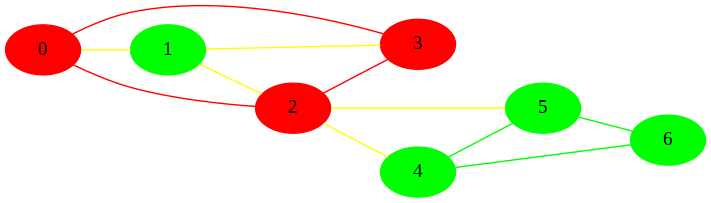

In [12]:
cores_arestas, setA, setB, count = corte_ingenuo(lista_adj, arestas)
plotar_grafo_lista_adj(cores_arestas, setA, setB)

In [13]:
def karger_contracao_ingenuo(lista_adj_original, arestas_original,N_iter):
    corte_min = []
    for i in range(N_iter):
        lista_adj = copy.deepcopy(lista_adj_original)
        arestas = copy.deepcopy(arestas_original)
        cores_arestas, setA, setB, count = corte_ingenuo(lista_adj, arestas)
        corte_min.append(count)
    print("MIN_cut:",np.min(corte_min))
    return cores_arestas, setA, setB, np.min(corte_min)

# Análise empirica

In [24]:
def analise_empirica(N_exec, N_iter, lista_adj,algoritmo):
    candidatos = []
    min_cut = 2  # corte mínimo do grafo.
    prob = 0.98  # 98% de probabilidade
    for i in tqdm(range(1,N_iter+1,1)):
        aux = []
        with contextlib.redirect_stdout(io.StringIO()):
            for j in range(N_exec): # roda N_exec vezes, rodei N_exec vezes, quantas dessas vezes retornou o corte mínimo com N_iter operações
              if algoritmo == karger_contracao_ingenuo:
                _, _, _, corte_atual = algoritmo(lista_adj, arestas,i*N_iter) # a cada iteração aumenta N_iter
                aux.append(corte_atual)
              else:
                _, _,quant_corte = algoritmo(lista_adj, arestas, i*N_iter)
                aux.append(quant_corte) # armazena o corte mínimo da iteração
        candidatos.append(aux)


    encontrados = []
    for i in range(len(candidatos)):
        cont = 0
        for item in candidatos[i]:
            if item == min_cut:
                cont += 1
            if cont/N_exec >= prob:
              break
        if cont/N_exec >= prob:
              break
        encontrados.append(cont/N_exec)
    encontrados.append(cont/N_exec)
    return [N_iter * (i+1) for i in range(len(encontrados))], encontrados

100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


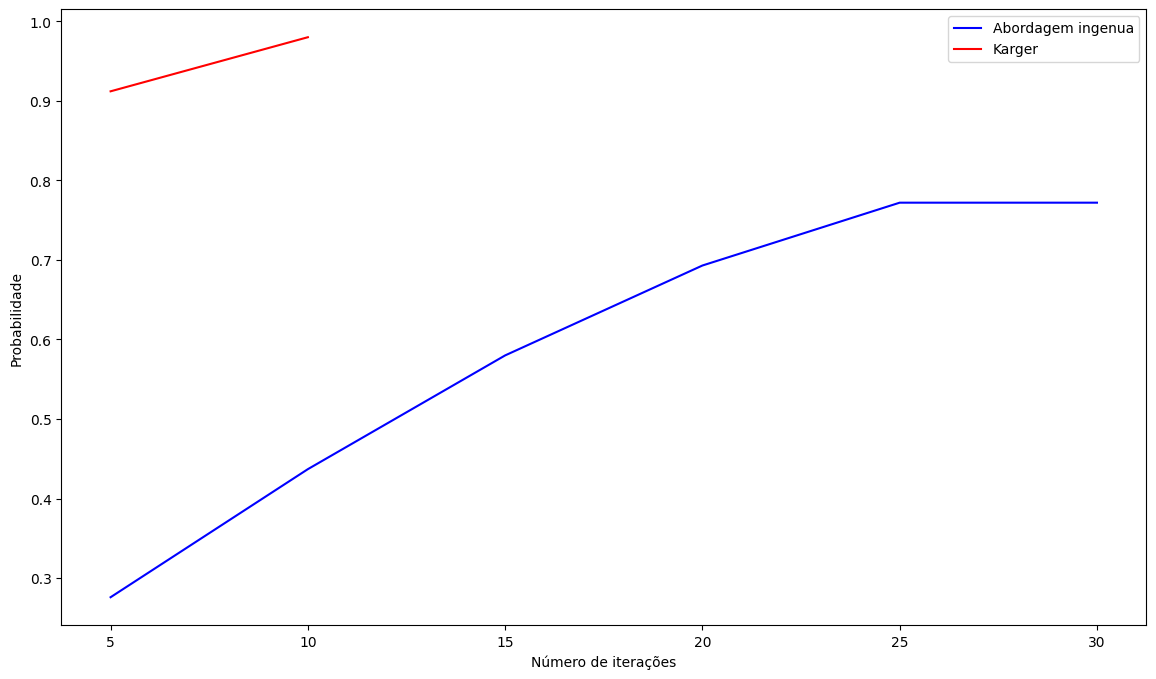

In [26]:
N_exec = 1000
N_iter = 5
x_ingenuo, y_ingenuo = analise_empirica(N_exec, N_iter, lista_adj, karger_contracao_ingenuo)
x_karger, y_karger = analise_empirica(N_exec, N_iter, lista_adj,karger_contracao2)

plt.figure(figsize=(14, 8))
plt.plot(x_ingenuo, y_ingenuo, label='Abordagem ingenua', c='b')
plt.plot(x_karger, y_karger, label='Karger', c='r')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade')
plt.xticks(x_ingenuo)
plt.legend()
plt.show()